# Objective of this project

## Predict the number of air passangers  in the next 2 years

In [1]:
##required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [2]:
df=pd.read_csv("AirPassengers.csv",parse_dates=[0],header=0,index_col=0,squeeze=True)
df.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [3]:
df.dtypes

dtype('int64')

In [4]:
df.size

144

In [6]:
#convert it to a dataframe
data=pd.DataFrame(df)
#preview the dataframe
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
#View the last five rows/observations
data.tail() 

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [8]:
data['1949-03']

,#Passengers
Month,
1949-03-01,132


In [9]:
data['1959']

,#Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


In [10]:
round(data.describe(), 2)

,#Passengers
count,144.00
mean,280.30
std,119.97
min,104.00
25%,180.00
50%,265.50
75%,360.50
max,622.00


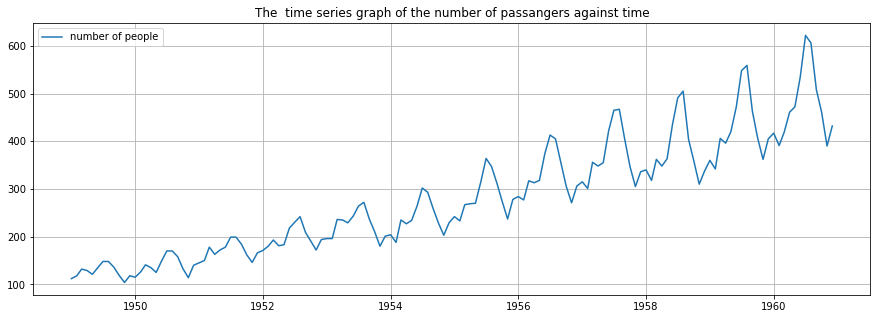

In [12]:
plt.figure(figsize=(15,5))
plt.plot(data,label='number of people')
plt.title("The  time series graph of the number of passangers against time")
plt.legend(loc='best')
plt.grid()

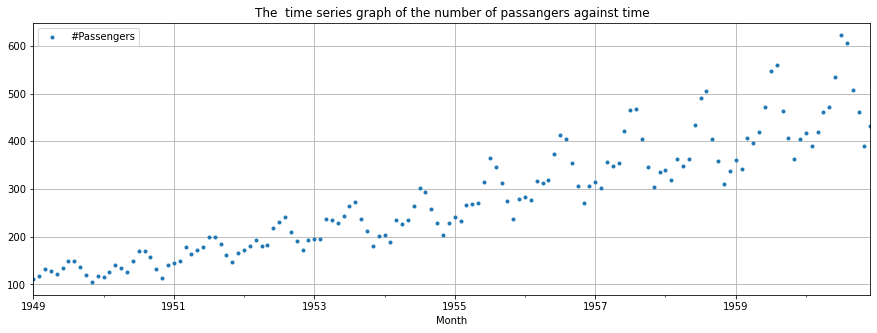

In [13]:
data.plot(style='.',label='Number of people',figsize=(15,5))
plt.title("The  time series graph of the number of passangers against time")
plt.legend(loc='best')
plt.grid()

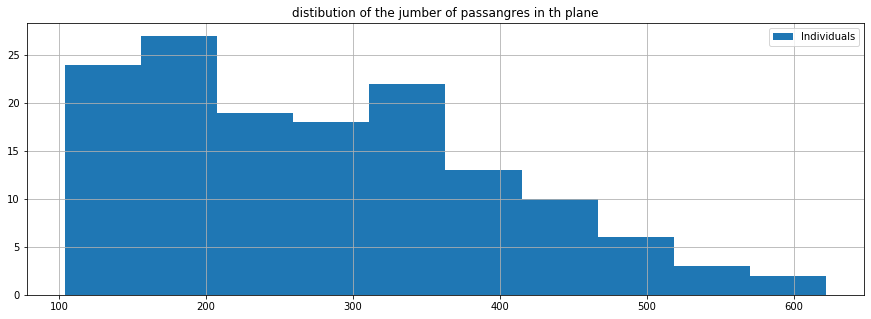

In [13]:
data.hist(figsize=(15,5),label='Individuals')
plt.title("distibution of the jumber of passangres in th plane")
plt.legend(loc='best')

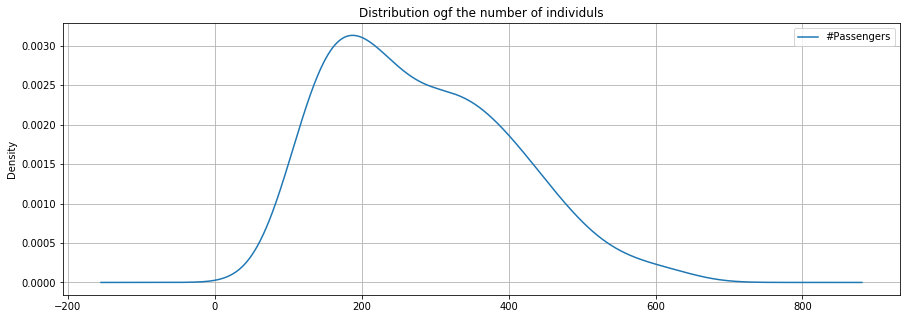

In [14]:
data.plot(kind='kde',figsize=(15,5))
plt.title('Distribution ogf the number of individuls')
plt.grid()

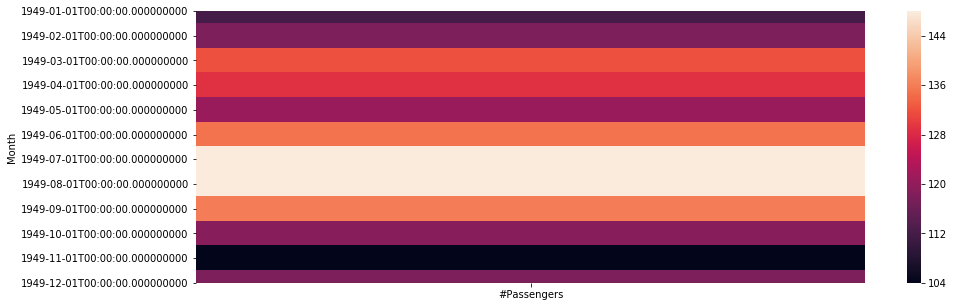

In [15]:
plt.figure(figsize=(15,5))
sns.heatmap(data['1949'])

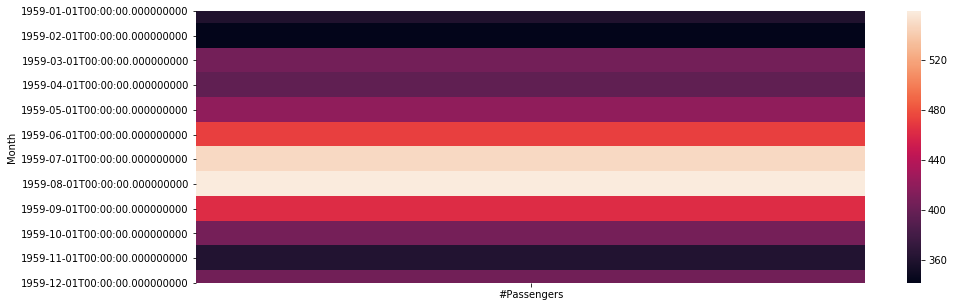

In [16]:
plt.figure(figsize=(15,5))
sns.heatmap(data['1959'])

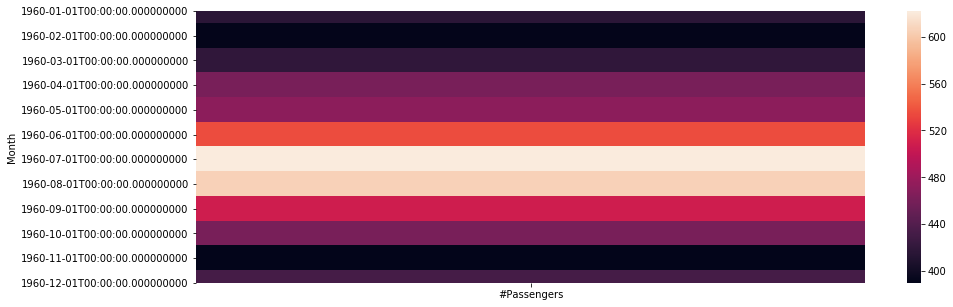

In [17]:
plt.figure(figsize=(15,5))
sns.heatmap(data['1960'])

High number of people were travellling at large numbers on dates 7 and 8 for every month

Text(0.5, 1.0, 'Relationship between lags')

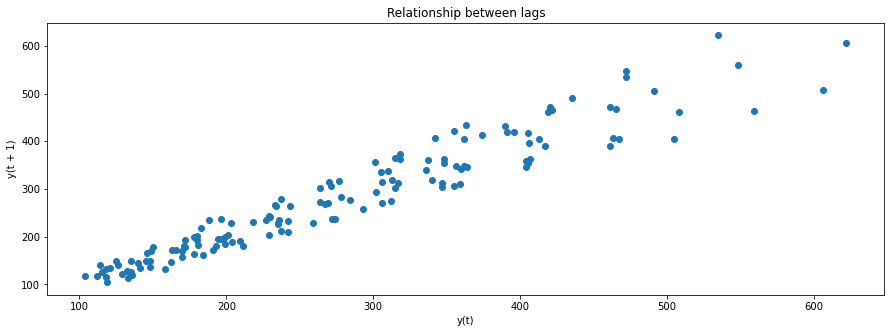

In [14]:
from pandas.plotting import lag_plot
plt.figure(figsize=(15,5))
lag_plot(data)
plt.title('Relationship between lags')

elatively strong positive correlation between observations and their lag1 values.

#### Time Series Autocorrelation Plots

Text(0.5, 1.0, 'The streght of relationship between the lags')

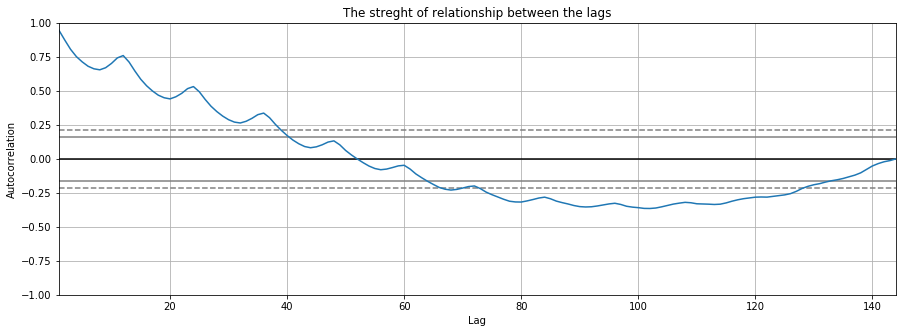

In [19]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15,5))
autocorrelation_plot(data)
plt.title('The strength of relationship between the lags')

 ## Persistence Algorithm

In [20]:
#creating the lagged dataset
values=pd.DataFrame(data.values)
dataframe=pd.concat([values.shift(1),values],axis=1)
dataframe.columns=['t-1','t+1']
dataframe.head()


,t-1,t+1
0,NaN,112
1,112.0,118
2,118.0,132
3,132.0,129
4,129.0,121


In [21]:
#spliting the dataset
x=dataframe.values
train_size=int(len(x)*0.66)
train,test=x[1:train_size],x[train_size:]
train_x,train_y=train[:,0] ,train[:1,]
test_x,test_y=test[:,0], test[:,1]


In [22]:
#persistence model
def model_persistence(x):
    return x

In [23]:

# walk-forward validation
from sklearn.metrics import mean_squared_error
predictions = list()
for x in test_x:
    yhat = model_persistence(x)  
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 2285.857


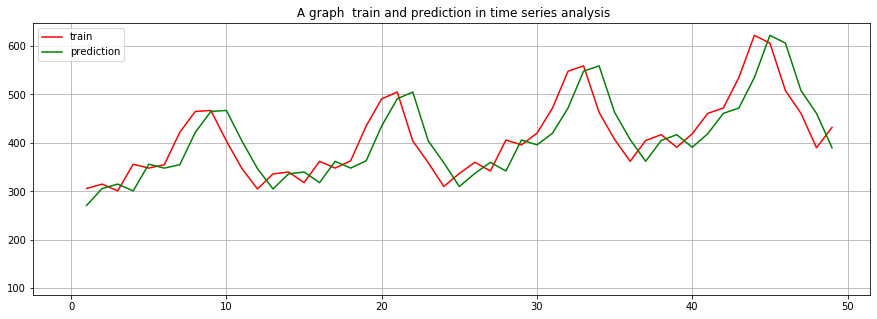

In [24]:
#ploting the training and the prediction to shpw the divergence
plt.figure(figsize=(15,5))
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y],color='red',label='train')
plt.plot([None for i in train_y] + [x for x in predictions],color='green',label='prediction')
plt.grid()
plt.legend()
plt.title("A graph  train and prediction in time series analysis")
plt.show()



From the plot of the persistence model predictions, it is clear that the model is one-step behind reality. There is 

a rising trend and month-to-month noise in the sales figures, which highlights the limitations of the persistence 

technique.

# Autoregression 

 ### Check for Autocorrelation

Text(0.5, 1.0, 'Relationship between lags')

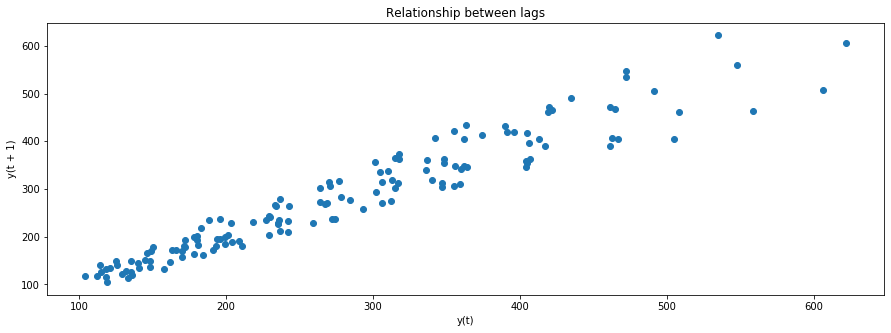

In [25]:
from pandas .plotting import lag_plot
plt.figure(figsize=(15,5))
lag_plot(data)
plt.title('Relationship between lags')

It clearly shows a relationship or some correlation which is posistive

In [26]:
dataframe.corr()

,t-1,t+1
t-1,1.000000,0.960195
t+1,0.960195,1.000000


It show a vety string oostive correlation which is good 

This method i awalys tedius if we have to check for large lag  variables

Text(0.5, 1.0, 'The autocorrelation  lags')

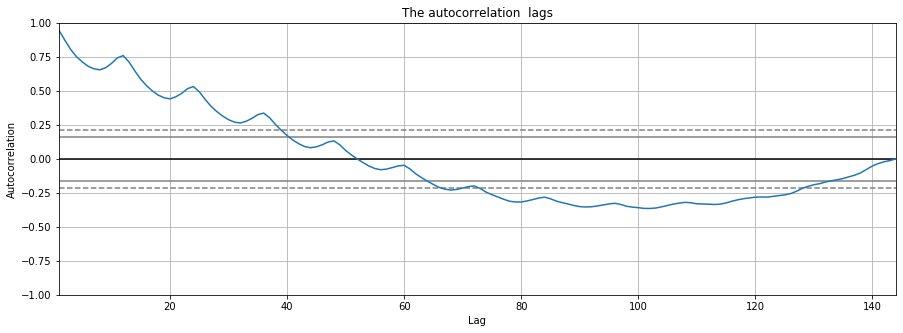

In [27]:
## Autocorrelation Plots
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15,5))
autocorrelation_plot(data)
plt.title('The autocorrelation  lags')

 plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-
 
 axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the 
 
 correlation values. Correlation values above these lines are more significant than those below the line, 
 
 providing a threshold or cutoff for selecting more relevant lag values.

 ### Auto correlation using the statsmodel

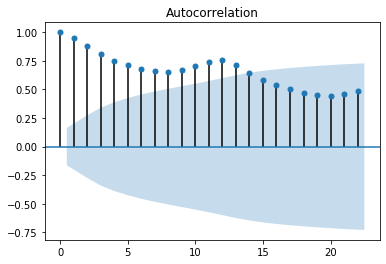

<Figure size 1080x360 with 0 Axes>

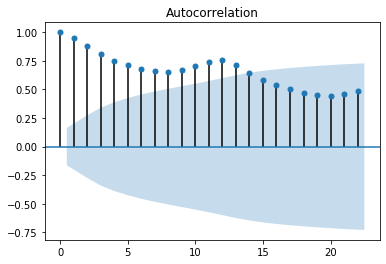

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(15,5))
plot_acf(data)


# Autoregression Model

In [29]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [30]:
# split dataset
X = data.values
train, test = X[1:len(X)-7], X[len(X)-7:]

In [31]:
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('coefiicient',model_fit.params )

coefiicient [ 4.40999915  0.54377634  0.31837725 -0.02344532 -0.09328385  0.23085169
 -0.15420365  0.09373805 -0.09291185  0.32015708 -0.46668114  0.05145669
  0.73075956 -0.25128548 -0.33381625  0.242229   -0.15796594 -0.09420813
 -0.08006763  0.05655165 -0.06648343 -0.14659542  0.29515085  0.24214347
  0.09150113 -0.02924769 -0.36689735 -0.01890586  0.12110732  0.0568705 ]


In [32]:
#make prediction
predictions=model_fit.predict(start=len(train), end=len(train)+len(test)-1,dynamic=False)
for i in range (len(predictions)):
    print('prediction =%f ,expected =%f'% (predictions[i],test[i]))


prediction =552.536526 ,expected =535.000000
prediction =632.633224 ,expected =622.000000
prediction =629.130658 ,expected =606.000000
prediction =527.457734 ,expected =508.000000
prediction =432.252914 ,expected =461.000000
prediction =399.961090 ,expected =390.000000
prediction =424.926456 ,expected =432.000000


In [33]:
rmse=sqrt(mean_squared_error(test,predictions))
print('Test rmse:%.3f'%rmse)

Test rmse:18.165


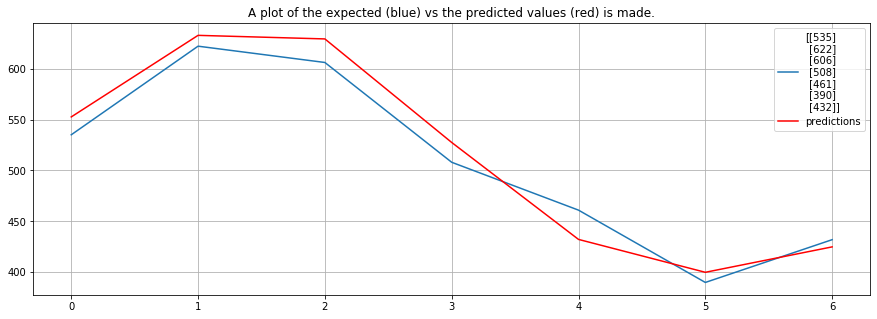

In [34]:
plt.figure(figsize=(15,5))
plt.plot(test,label=test)
plt.plot(predictions, color='red',label='predictions')
plt.legend(loc='best')
plt.grid()
plt.title('A plot of the expected (blue) vs the predicted values (red) is made.')
plt.show()

We can see a small improvement in the forecast when comparing the error scores

# ARIMA

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
#fit the model
model7=ARIMA(data,order=(5,1,0))

In [37]:
model7_fit=model7.fit()

In [38]:
#summary of the model
print(model7_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -689.067
Date:                Thu, 17 Jun 2021   AIC                           1390.135
Time:                        14:38:25   BIC                           1407.912
Sample:                    01-01-1949   HQIC                          1397.358
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.097      3.334      0.001       0.133       0.512
ar.L2         -0.2170      0.078     -2.776      0.006      -0.370      -0.064
ar.L3         -0.0646      0.071     -0.915      0.3

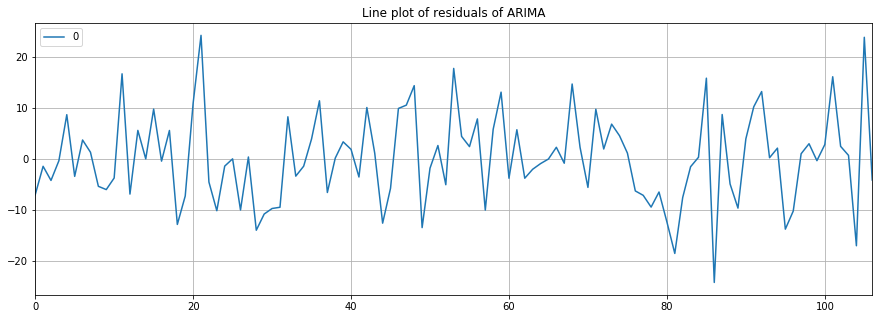

In [39]:
#lineplot of the residued
residual=pd.DataFrame(model_fit.resid)
residual.plot(figsize=(15,5))
plt.title('Line plot of residuals of ARIMA')
plt.grid()

line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

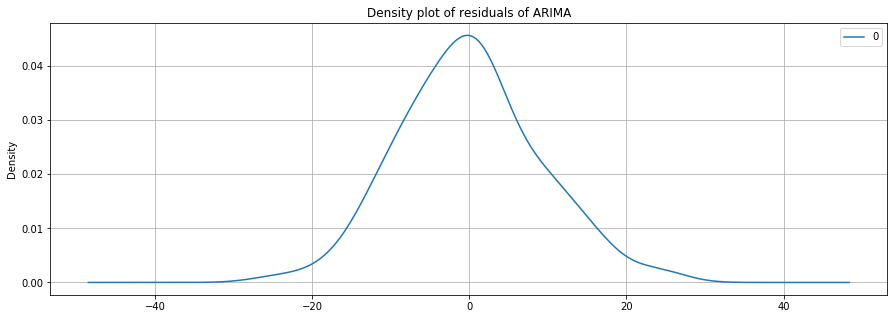

In [40]:
#density plot of the residues
residual=pd.DataFrame(model_fit.resid)
residual.plot(kind='kde',figsize=(15,5))
plt.title('Density plot of residuals of ARIMA')
plt.grid()

Density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero

In [41]:
print(residual.describe())

                  0
count  1.070000e+02
mean   2.325533e-12
std    8.878861e+00
min   -2.426371e+01
25%   -5.937614e+00
50%   -4.922590e-02
75%    5.002645e+00
max    2.415763e+01


 The results of distribution of the residual errors  show that indeed there is a bias in the 

 prediction (a non-zero mean in the residuals).

In [42]:
#split the data
X = data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(4,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=275.755017, expected=306.000000
predicted=342.220998, expected=315.000000
predicted=320.780569, expected=301.000000
predicted=303.034793, expected=356.000000
predicted=362.247158, expected=348.000000
predicted=328.838147, expected=355.000000
predicted=366.191254, expected=422.000000
predicted=414.882104, expected=465.000000
predicted=469.118863, expected=467.000000
predicted=459.185377, expected=404.000000
predicted=371.625393, expected=347.000000
predicted=341.714135, expected=305.000000
predicted=304.210965, expected=336.000000
predicted=378.976527, expected=340.000000
predicted=345.614733, expected=318.000000
predicted=321.480948, expected=362.000000
predicted=366.730343, expected=348.000000
predicted=339.624716, expected=363.000000
predicted=374.952088, expected=435.000000
predicted=436.561181, expected=491.000000
predicted=508.859274, expected=505.000000
predicted=485.883435, expected=404.000000
predicted=349.489511, expected=359.000000
predicted=368.783663, expected=310

In [43]:
#evaluation of the model
rmse=sqrt(mean_squared_error(test,predictions))
print('Test rmse:%.3f'%rmse)

Test rmse:43.520


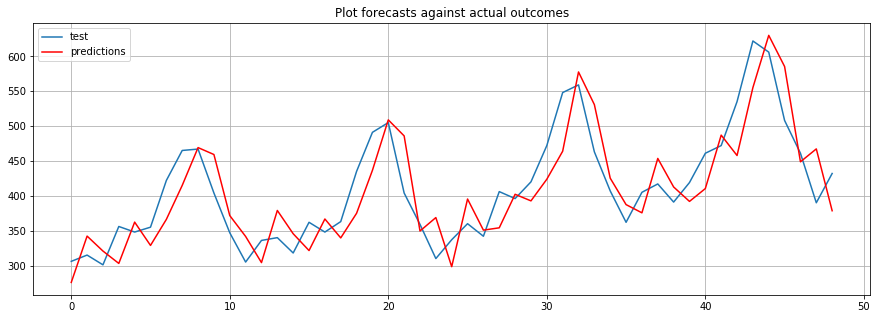

In [44]:
# plot forecasts against actual outcomes
plt.figure(figsize=(15,5))
plt.plot(test,label='test')
plt.plot(predictions,color='red',label='predictions')
plt.legend(loc='best')
plt.grid()
plt.title('Plot forecasts against actual outcomes')
plt.show()


The values show some trend and are in the correct scale.

Done and complied by

## Osindi Bonface 
### Data Scientist || Data Engineering Expert